In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
import celerite
from celerite import terms
from celerite.modeling import Model
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from astropy.table import Table

rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('miyake12.csv')
cf.prepare_function(production='miyake', fit_solar=True)

In [3]:
%%time
default_params = [775., 1./12, np.pi/2., 81./12, 2*np.pi/11, 0.18]
sampler = cf.sampling(default_params, burnin=100, production=200)

Running burn-in...


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


Running production...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:27<00:00,  7.25it/s]

CPU times: user 44.2 s, sys: 1 s, total: 45.2 s
Wall time: 42.8 s


AttributeError: 'CarbonFitter' object has no attribute 'miyake_event'

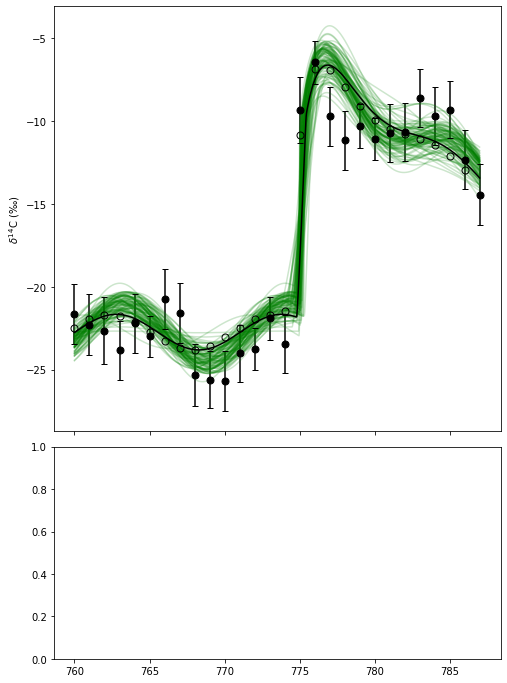

In [4]:
cf.plot_samples(sampler)

In [15]:
@jit
def super_gaussian(t, start_time, duration, area):
    middle = start_time+duration/2.
    height = area/duration
    return height*jnp.exp(- ((t-middle)/(1./1.93516*duration))**16.)

@jit
def miyake_event_fixed_solar(t, start_time, duration, phase, area):
    height = super_gaussian(t, start_time, duration, area)
    prod =  0.1 + 0.18 * 0.1 * jnp.sin(2 * np.pi / 11 * t + phase) + height
    return prod

In [16]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('miyake12.csv')
cf.prepare_function(custom_function=True, f=miyake_event_fixed_solar)

In [17]:
%%time
default_params = [775., 1./12, np.pi/2., 81./12]
sampler = cf.sampling(default_params, burnin=100, production=200)

Running burn-in...


 36%|█████████████████████████████▌                                                    | 36/100 [00:03<00:05, 10.94it/s]Traceback (most recent call last):
  File "/home/qingyuanzhang/.local/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
KeyboardInterrupt
 36%|█████████████████████████████▌                                                    | 36/100 [00:03<00:05, 10.69it/s]

emcee: Exception while calling your likelihood function:
  params: [7.75018013e+02 9.57544610e-02 1.56892510e+00 6.75348369e+00]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [18]:
from scipy.interpolate import interp1d

In [26]:
x = np.linspace(0, 10, num=50, endpoint=True)
x_fine = np.linspace(0, 10, 1000)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

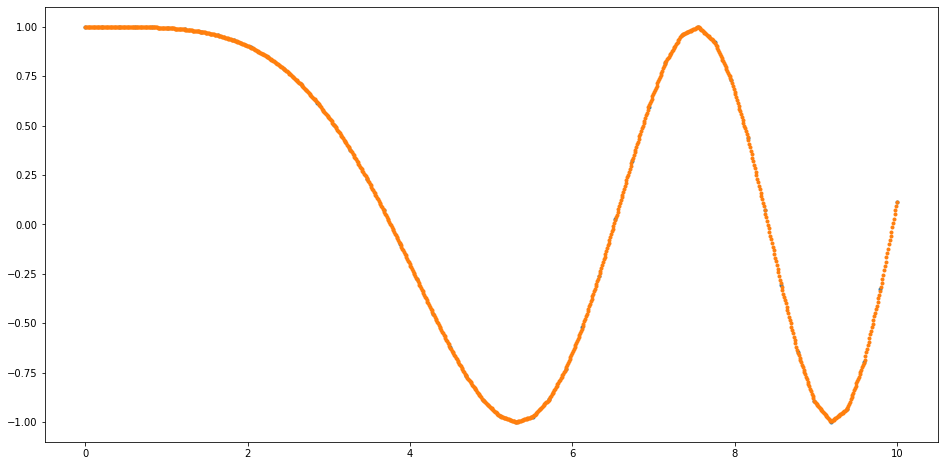

In [28]:
plt.plot(x, y, ".")
plt.plot(x_fine, f(x_fine), ".")